In [102]:
import os
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import datasets, metrics, linear_model
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [103]:
dir_data = '../data/ml100marathon'
train_app = os.path.join(dir_data, 'train_data.csv')
test_app = os.path.join(dir_data, 'test_features.csv')

In [104]:
df_train = pd.read_csv(train_app)
df_train.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [105]:
df_test = pd.read_csv(test_app)
df_test.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,...,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,...,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0


In [106]:
# corr_about_TARGET = df_train.corr()['poi']
# df_train.corr()

In [107]:
# dtype_select = ['float64', 'int64']
# selected_vector = [False]*len(df_train.dtypes)
# for type_sel in dtype_select:
#     selected_vector |= (df_train.dtypes == type_sel)
# numeric_columns = list(df_train.columns[list(selected_vector)])
# print("Number of columns", len(numeric_columns))
# # 再把只有 2 值 (通常是 0,1) 的欄位去掉
# numeric_columns = list(df_train[numeric_columns].columns[list(df_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
# fig_num = len(numeric_columns)
# print("Number of remained columns", len(numeric_columns))

# plt.figure(figsize=(20,fig_num*3))
# index = 1
# for col in numeric_columns:
#     plt.subplot(fig_num,1,index)
#     plt.title(col)
#     df_train.boxplot(col,vert=False)
#     index += 1
# plt.show()

In [108]:
# plt.figure(figsize=(20,fig_num*3))
# plt.subplots_adjust(hspace=0.5)
# index = 1
# for col in numeric_columns:
#     #print(type(col),col,'correlation is ',corr_about_TARGET[col])
#     plt.subplot(fig_num,1,index)
#     plt.title(col+' corr = '+str(corr_about_TARGET[col]))
#     plt.plot(df_train[col],df_train['poi'],'.')
#     index += 1
# plt.show()

In [174]:
train_Y = df_train['poi']
test_name = df_test['name']
result_back = df_test[df_test['name']=='TOTAL']
df_train_d = df_train.drop(['director_fees','loan_advances','name', 'email_address','restricted_stock_deferred','poi'] , axis=1)
df_test_d = df_test.copy()
df_test_d[df_test_d['name'] == 'TOTAL'] = np.nan
df_test_d = df_test_d.drop(['director_fees','loan_advances','name','restricted_stock_deferred','email_address'] , axis=1)
result_back_d = result_back.drop(['director_fees','loan_advances','name','restricted_stock_deferred','email_address'] , axis=1)
print(df_train_d.values.shape)
print(df_test_d.values.shape)
df = pd.concat([df_train_d,df_test_d])
print(df.values.shape)
train_num = train_Y.shape[0]
df.head()

(113, 16)
(33, 16)
(146, 16)


,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,174839.0,2748364.0,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,22122.0,6843672.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,1624396.0,22884.0,39.0,13.0,14.0,NaN,1573324.0,869220.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,602671.0,907502.0,985032.0,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,35818.0,144.0,199.0,25.0,375304.0,486.0,126027.0,240189.0,2188.0,2598.0,1639297.0,126027.0


In [175]:
def null_outliers (in_df, col, gt, th):
    out_df = in_df.copy()
    if gt == 1:
        mask = in_df[col] >= th
    else:
        mask = in_df[col] <= th
    out_df.loc[mask,col] = np.nan
    for i in range(len(mask)):
        if mask[i] == True:
            print('The '+str(i)+'-th entry of column: '+col+' (originally '+str(in_df.iloc[i,df_train_d.columns.get_loc(col)])+') is replaced by nan')
    return out_df

In [176]:
df_train_d = null_outliers(df_train_d,'bonus',1,4000000)
#df_train_d

The 1-th entry of column: bonus (originally 5600000.0) is replaced by nan
The 8-th entry of column: bonus (originally 7000000.0) is replaced by nan
The 14-th entry of column: bonus (originally 4175000.0) is replaced by nan
The 33-th entry of column: bonus (originally 8000000.0) is replaced by nan


(81, 16)


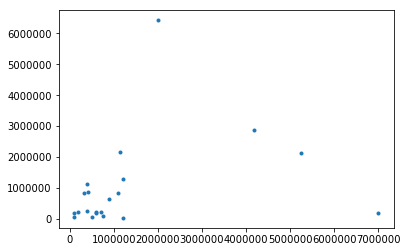

16

In [177]:
df_drop_total = df[df['bonus'] < 5e7 ]
print(df_drop_total.shape)
plt.plot(df_drop_total['bonus'],df_drop_total['deferral_payments'],'.')
plt.show()
all_corr = df_drop_total.corr()
len(list(df_drop_total))

In [74]:
df_train[df_train['bonus']>4000000]

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
8,LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,...,3600000.0,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
14,ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
33,LAVORATO JOHN J,8000000.0,NaN,NaN,NaN,john.lavorato@enron.com,4158995.0,49537.0,2585.0,528.0,...,2035380.0,1552.0,False,1008149.0,NaN,339288.0,3962.0,7259.0,10425757.0,5167144.0


In [ ]:
df[]

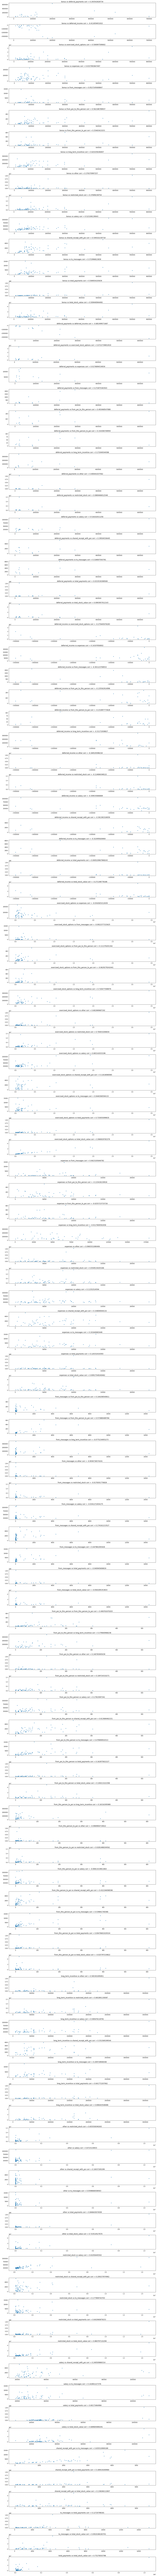

In [60]:
fig_num = 8*15 
plt.figure(figsize=(20,fig_num*3))
plt.subplots_adjust(hspace=0.5)
index = 1
for i in range(len(list(df_drop_total))):
    for j in range(len(list(df_drop_total))):
        if j > i:
            plt.subplot(fig_num,1,index)
            plt.title(list(df_drop_total)[i]+' vs '+list(df_drop_total)[j]+' corr = '+str(all_corr.iloc[i,j]))
            plt.plot(df_drop_total.iloc[:,i],df_drop_total.iloc[:,j],'.')
            index += 1
plt.show()

In [178]:
df1 = df.fillna(df.mean())
df_temp = MinMaxScaler().fit_transform(df1)
train_X = df_temp[:train_num]
test_X = df_temp[train_num:]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
estimator.fit(train_X,train_Y)
y_hat = estimator.predict(test_X)
#print(test_X)
print(y_hat)
y_prob1 = estimator.predict_proba(test_X)[:,1]
print(y_prob1)
print(df1.shape)
df1

0.885375494071
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
[ 0.16980904  0.10212427  0.27800961  0.09460833  0.11146645  0.11914403
  0.4352575   0.10239081  0.11073795  0.0994518   0.11849856  0.10986792
  0.11418892  0.0946913   0.20467358  0.11561192  0.11357731  0.09991946
  0.10867059  0.1087199   0.11981043  0.12069567  0.12523348  0.11883452
  0.1074976   0.10333489  0.12177124  0.1105185   0.10729205  0.12381829
  0.11900462  0.11629643  0.13029095]
(146, 16)


,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1.750000e+06,8.416025e+05,-3.504386e+06,1.979418e+07,46950.000000,18.000000,42.000000,4.000000,1617011.0,1.748390e+05,2.748364e+06,4.206360e+05,864.000000,905.000000,5.050500e+05,2.254254e+07
1,5.600000e+06,8.416025e+05,-5.810498e+05,1.925000e+07,29336.000000,108.000000,88.000000,30.000000,1920000.0,2.212200e+04,6.843672e+06,1.111258e+06,2042.000000,3627.000000,8.682716e+06,2.609367e+07
2,2.000000e+05,8.416025e+05,-4.167000e+03,1.624396e+06,22884.000000,39.000000,13.000000,14.000000,746491.2,1.573324e+06,8.692200e+05,2.118440e+05,91.000000,225.000000,2.003885e+06,2.493616e+06
3,8.000000e+05,8.416025e+05,-5.810498e+05,2.959559e+06,118134.000000,608.790698,64.895349,41.232558,602671.0,9.075020e+05,9.850320e+05,2.243050e+05,1176.465116,2073.860465,2.652612e+06,9.850320e+05
4,1.250000e+06,8.416025e+05,-2.625000e+05,2.959559e+06,35818.000000,144.000000,199.000000,25.000000,375304.0,4.860000e+02,1.260270e+05,2.401890e+05,2188.000000,2598.000000,1.639297e+06,1.260270e+05
5,1.201773e+06,1.025900e+04,-5.810498e+05,3.076606e+07,77978.000000,608.790698,64.895349,41.232558,746491.2,2.856000e+03,1.147424e+06,2.840875e+05,1176.465116,2073.860465,9.109300e+04,3.076606e+07
6,1.201773e+06,8.416025e+05,-5.810498e+05,8.308552e+06,53947.000000,608.790698,64.895349,41.232558,746491.2,1.479500e+05,3.576206e+06,1.584030e+05,1176.465116,2073.860465,3.603000e+05,1.188476e+07
7,1.200000e+06,2.761000e+04,-1.440620e+05,2.959559e+06,16514.000000,40.000000,240.000000,11.000000,746491.2,1.017400e+05,6.982420e+05,2.885420e+05,1132.000000,1758.000000,1.490344e+06,6.982420e+05
8,7.000000e+06,2.029110e+05,-3.000000e+05,3.434838e+07,99832.000000,36.000000,123.000000,16.000000,3600000.0,1.035973e+07,1.476169e+07,1.072321e+06,2411.000000,4273.000000,1.035598e+08,4.911008e+07
9,6.000000e+05,8.416025e+05,-5.810498e+05,3.847280e+05,125978.000000,16.000000,52.000000,6.000000,71023.0,2.003080e+05,3.938180e+05,2.749750e+05,874.000000,873.000000,1.272284e+06,7.785460e+05


In [179]:
# df1 = df.fillna(df.mean())
# df_temp = MinMaxScaler().fit_transform(df1)
# train_X = df_temp[:train_num]
# test_X = df_temp[train_num:]
# estimator = GradientBoostingClassifier()
# print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
# estimator.fit(train_X,train_Y)
# y_hat = estimator.predict(test_X)
# #print(test_X)
# print(y_hat)
# y_prob2 = estimator.predict_proba(test_X)[:,1]
# print(y_prob2)

In [180]:
# df1 = df.fillna(df.mean())
# df_temp = StandardScaler().fit_transform(df1)
# train_X = df_temp[:train_num]
# test_X = df_temp[train_num:]
# estimator = RandomForestClassifier()
# print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
# estimator.fit(train_X,train_Y)
# y_hat = estimator.predict(test_X)
# #print(test_X)
# print(y_hat)
# y_prob3 = estimator.predict_proba(test_X)[:,1]
# print(y_prob3)

In [182]:
y_pred_df = pd.DataFrame(data={'name':test_name.values,'poi':y_prob1})
y_pred_df.to_csv('02_17_2.csv',index=None)

In [112]:
y_pred_df

,name,poi
0,BELDEN TIMOTHY N,0.055139
1,BOWEN JR RAYMOND M,0.278314
2,HANNON KEVIN P,0.292779
3,DELAINEY DAVID W,0.066852
4,CAUSEY RICHARD A,0.193842
5,HICKERSON GARY J,0.148911
6,FREVERT MARK A,0.600754
7,CHAN RONNIE,0.044388
8,DONAHUE JR JEFFREY M,0.046989
9,REYNOLDS LAWRENCE,0.059511


In [ ]:
print(X_test.shape)
print(y_pred.shape)

# vocabulary
* repayment: 貸款的還款
* loan advances: 貸款預付款
* promissory note: 本票
* severance: 遣散